# Credit Card Application

To create a model that forecasts the propensity (probability) of customers responding to a personal loan campaign, we will utilize logistic regression. The outcomes will be categorized and the factors influencing the answer will be found using the model's probability. Building a model that identifies clients who are most likely to accept the loan offer in upcoming personal loan campaigns is the objective.

### 1) Importing required libraries

In [582]:
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install joblib
%pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [583]:
%pip install scikit-learn
%pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [584]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

### 2) Importing and Descriptive Stats

To market their loan products to people who already have deposit accounts, BankABC wants to create a direct marketing channel. To cross-sell personal loans to its current clients, the bank ran a test campaign. An enticing personal loan offer and processing charge waiver were aimed at a random group of 20000 clients. The targeted clients' information has been provided, together with information on how they responded to the marketing offer.

In [585]:
# READ DATA
data = pd.read_excel("Approval.xlsx") 
data.shape  

data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [586]:
# GETTING THE DIMENSIONS OF THE ARRAY
data.shape

(690, 16)

In [587]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST 15 ENTRIES OF THE DATA
data.head(15)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [588]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
data.tail(15)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
675,0,41.58,1.040,1,1,ConsumerStaples,White,0.665,0,0,0,0,ByBirth,240,237,0
676,0,30.58,10.665,1,1,Materials,Black,0.085,0,1,12,1,ByBirth,129,3,0
677,1,19.42,7.250,1,1,CommunicationServices,White,0.040,0,1,1,0,ByBirth,100,1,0
678,0,17.92,10.210,1,1,Healthcare,Latino,0.000,0,0,0,0,ByBirth,0,50,0
679,0,20.08,1.250,1,1,Energy,White,0.000,0,0,0,0,ByBirth,0,0,0
680,1,19.50,0.290,1,1,Financials,White,0.290,0,0,0,0,ByBirth,280,364,0
681,1,27.83,1.000,0,0,Real Estate,Black,3.000,0,0,0,0,ByBirth,176,537,0
682,1,17.08,3.290,1,1,ConsumerDiscretionary,White,0.335,0,0,0,1,ByBirth,140,2,0
683,1,36.42,0.750,0,0,Real Estate,White,0.585,0,0,0,0,ByBirth,240,3,0
684,1,40.58,3.290,1,1,CommunicationServices,White,3.500,0,0,0,1,ByOtherMeans,400,0,0


In [589]:
# DESCRIPTIVE STATS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [590]:
data.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


## 3) Handling Missing Values

In [591]:
#checking for null values
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [592]:
#IMPUTE MISSING VALUES

#for numeric data using mean 
for val in data:
    # Check if the column is of numeric type
    if data[val].dtypes != "object":
        # Calculate mean
        m=data[val].mean()
        #replace null with mean
        data = data.fillna(m)





# For non numeric data using mode
for val in data:
    # Check if the column is of object type
    if data[val].dtypes == 'object':
        # Impute with the most frequent value
        data = data.fillna(data[val].value_counts().index[0])

# you can try handling non-numeric data as per your choice

In [593]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


## 4) Data Pre-processing

In [594]:
#Converting all non-numeric data to numeric - using label encoding
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()

for val in data:
    # Compare if the dtype is object
    if data[val].dtypes=='object':
        data[val]=le.fit_transform(data[val])

data.head()
#you can also use one-hot encoding and try building the model


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1


In [595]:
#one hot encoding

industry= pd.get_dummies(data.Industry, prefix="Industry")
data = pd.concat([data, industry],axis=1)
data.drop(columns="Industry",inplace=True)



data.Industry_4.replace(to_replace=['true', 'false'], value=[1, 0], inplace=True)

In [596]:
data*=1
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,...,Industry_4,Industry_5,Industry_6,Industry_7,Industry_8,Industry_9,Industry_10,Industry_11,Industry_12,Industry_13
0,1,30.83,0.000,1,1,4,1.250,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,58.67,4.460,1,1,1,3.040,1,1,6,...,0,0,0,0,0,1,0,0,0,0
2,0,24.50,0.500,1,1,1,1.500,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,27.83,1.540,1,1,4,3.750,1,1,5,...,0,0,0,1,0,0,0,0,0,0
4,1,20.17,5.625,1,1,4,1.710,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,32.08,4.000,1,1,4,2.500,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,33.17,1.040,1,1,1,6.500,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,22.92,11.585,1,1,4,0.040,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1,54.42,0.500,0,0,1,3.960,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9,1,42.50,4.915,0,0,4,3.165,1,0,0,...,0,0,0,1,0,0,0,0,0,0


/var/folders/l4/_lp9_fgn6_nd302nr_8_q67r0000gn/T/ipykernel_90515/1017638797.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax, bins = 30)


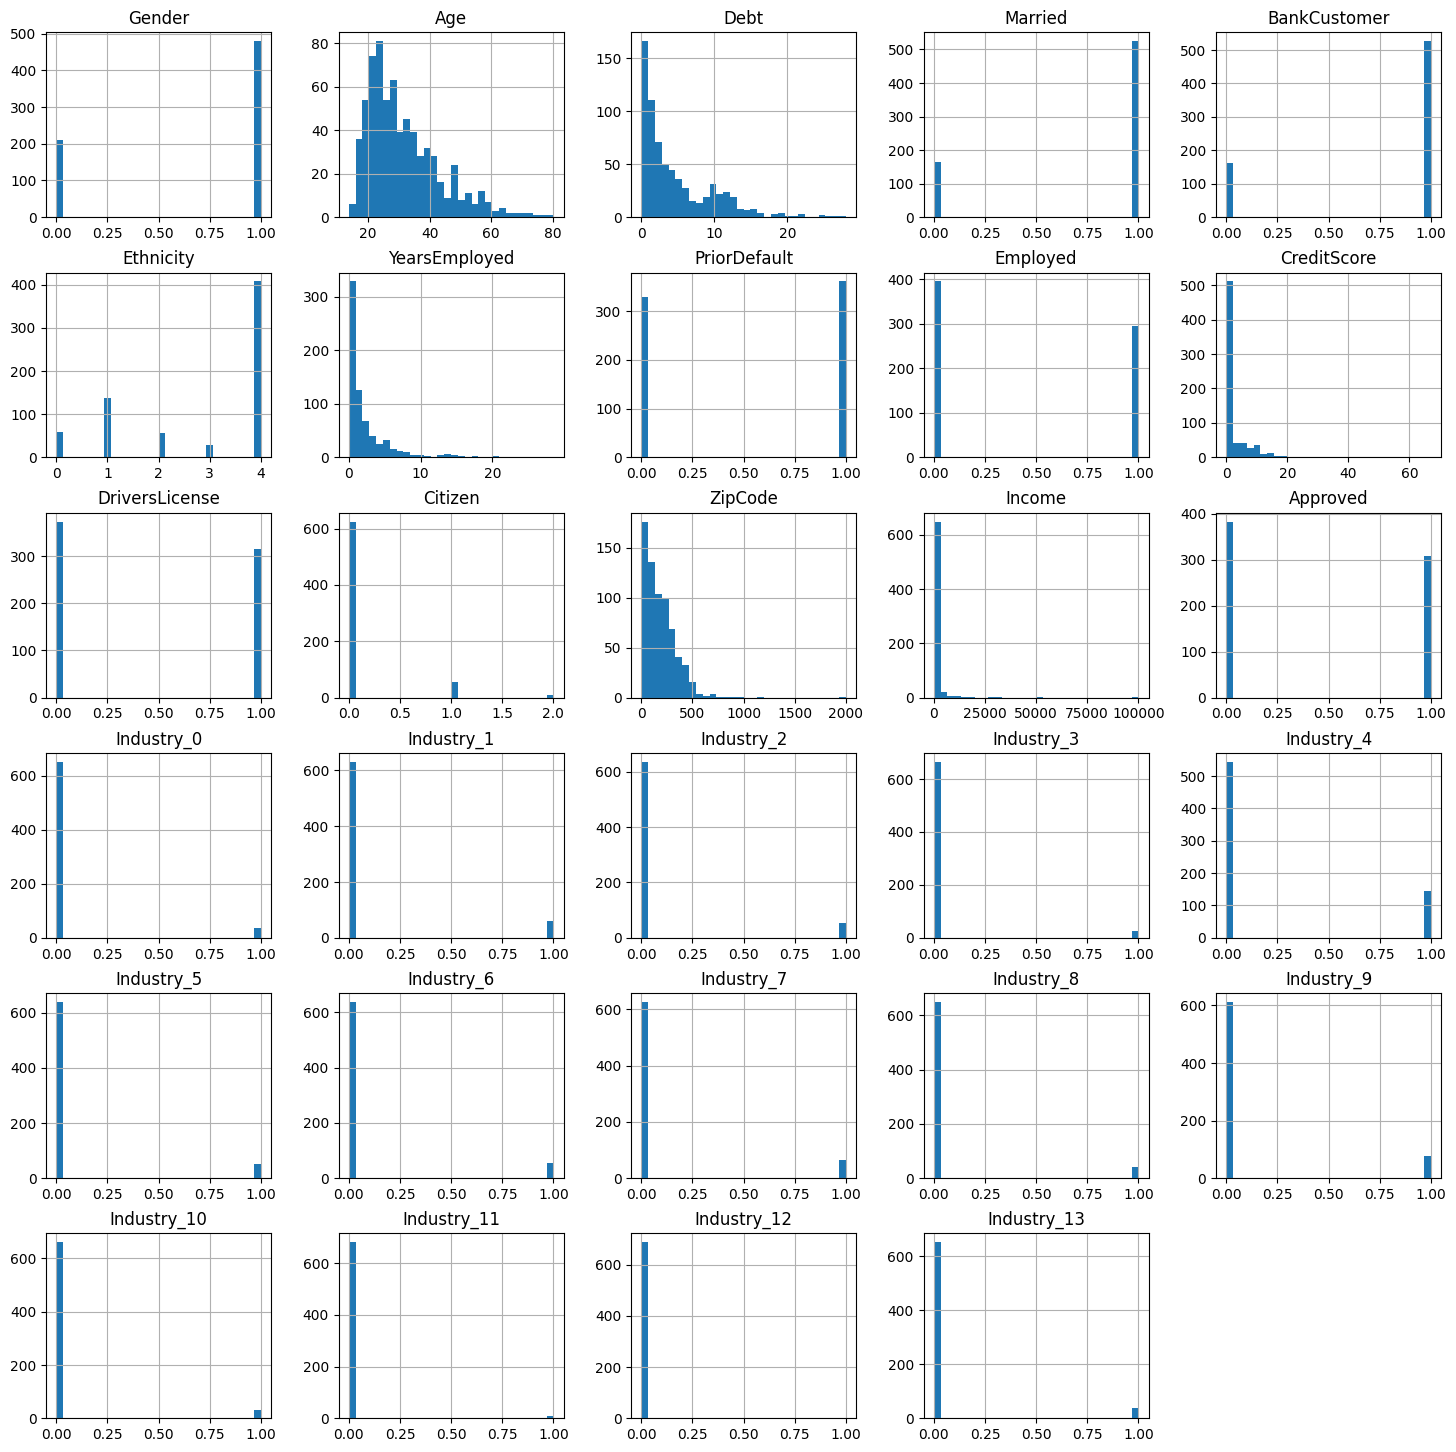

In [597]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
data.hist(ax=ax, bins = 30)
plt.show()

In [598]:
# CREATING A COPY TO RETAIN THE NUMERICAL INFORMATION OF THE DATA AS WE CHANGE THE 0 AND 1 TO
# 'DID NOT RESPOND' AND 'RESPONDED'

###
data1 = data.copy()
data1.head()
###

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,...,Industry_4,Industry_5,Industry_6,Industry_7,Industry_8,Industry_9,Industry_10,Industry_11,Industry_12,Industry_13
0,1,30.83,0.000,1,1,4,1.25,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,58.67,4.460,1,1,1,3.04,1,1,6,...,0,0,0,0,0,1,0,0,0,0
2,0,24.50,0.500,1,1,1,1.50,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,27.83,1.540,1,1,4,3.75,1,1,5,...,0,0,0,1,0,0,0,0,0,0
4,1,20.17,5.625,1,1,4,1.71,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [599]:
# RENAMING THE 0 AND 1 TO 'NOT APPROVED' AND 'APPROVED' RESPECTIVELY
data1.loc[:, 'Approved'] = data.loc[:, 'Approved'].apply(lambda x: 'Approved' if x == 1 else 'Not approved')


In [600]:
data1.head(20)

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,...,Industry_4,Industry_5,Industry_6,Industry_7,Industry_8,Industry_9,Industry_10,Industry_11,Industry_12,Industry_13
0,1,30.83,0.000,1,1,4,1.250,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,58.67,4.460,1,1,1,3.040,1,1,6,...,0,0,0,0,0,1,0,0,0,0
2,0,24.50,0.500,1,1,1,1.500,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,27.83,1.540,1,1,4,3.750,1,1,5,...,0,0,0,1,0,0,0,0,0,0
4,1,20.17,5.625,1,1,4,1.710,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,32.08,4.000,1,1,4,2.500,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,33.17,1.040,1,1,1,6.500,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,22.92,11.585,1,1,4,0.040,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1,54.42,0.500,0,0,1,3.960,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9,1,42.50,4.915,0,0,4,3.165,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [601]:
data.head() #testing only

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,...,Industry_4,Industry_5,Industry_6,Industry_7,Industry_8,Industry_9,Industry_10,Industry_11,Industry_12,Industry_13
0,1,30.83,0.000,1,1,4,1.25,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,58.67,4.460,1,1,1,3.04,1,1,6,...,0,0,0,0,0,1,0,0,0,0
2,0,24.50,0.500,1,1,1,1.50,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,27.83,1.540,1,1,4,3.75,1,1,5,...,0,0,0,1,0,0,0,0,0,0
4,1,20.17,5.625,1,1,4,1.71,1,0,0,...,0,0,0,1,0,0,0,0,0,0


                  Gender       Age      Debt   Married  BankCustomer  \
Gender          1.000000  0.035044 -0.041746 -0.068062     -0.071250   
Age             0.035044  1.000000  0.202177  0.106929      0.099477   
Debt           -0.041746  0.202177  1.000000  0.074649      0.083781   
Married        -0.068062  0.106929  0.074649  1.000000      0.992033   
BankCustomer   -0.071250  0.099477  0.083781  0.992033      1.000000   
YearsEmployed   0.086544  0.391464  0.298902  0.069945      0.075905   
PriorDefault   -0.026047  0.204434  0.244317  0.145073      0.138535   
Employed       -0.077784  0.086037  0.174846  0.175428      0.170268   
CreditScore    -0.024630  0.187327  0.271207  0.113968      0.111077   
DriversLicense  0.051674  0.053599 -0.013023 -0.009784     -0.002402   
ZipCode         0.086007 -0.078690 -0.217903 -0.017074     -0.009513   
Income         -0.002063  0.018719  0.123121 -0.006899      0.057273   
Approved       -0.028934  0.164086  0.206294  0.180583      0.18

<Axes: >

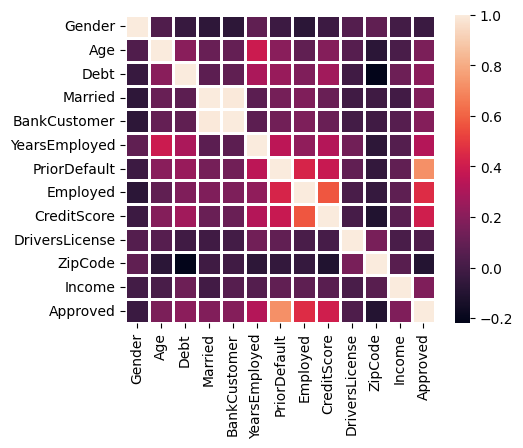

In [602]:
# # calculate the correlation matrix
#data2=data.drop(["Industry","Ethnicity","Citizen"],axis="columns")
#data2.head()
data.head()

corr = data2.corr()
print(corr)
# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr,
xticklabels=corr.columns,
yticklabels=corr.columns,
linewidths=.75)


In [603]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,...,Industry_4,Industry_5,Industry_6,Industry_7,Industry_8,Industry_9,Industry_10,Industry_11,Industry_12,Industry_13
0,1,30.83,0.000,1,1,4,1.25,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,58.67,4.460,1,1,1,3.04,1,1,6,...,0,0,0,0,0,1,0,0,0,0
2,0,24.50,0.500,1,1,1,1.50,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,27.83,1.540,1,1,4,3.75,1,1,5,...,0,0,0,1,0,0,0,0,0,0
4,1,20.17,5.625,1,1,4,1.71,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## 5) Model Building

Now, we divide our data into sets for training and testing. This procedure is carried out to get our data ready for the training and testing phases of machine learning modeling. In theory, a machine learning model's training process shouldn't be guided by information from the test data or scaled from the test data. For this model, we'll split the costs 70/30. DriversLicense and ZipCode information are not as crucial for credit card approval prediction as the other features in the dataset. To determine the best set of characteristics, we should drop them. This is the feature selection procedure.

In [604]:
from sklearn.model_selection import train_test_split

#drop variables not needed


data = data.drop(['DriversLicense','ZipCode'], axis= "columns")


data.head()

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,...,Industry_4,Industry_5,Industry_6,Industry_7,Industry_8,Industry_9,Industry_10,Industry_11,Industry_12,Industry_13
0,1,30.83,0.000,1,1,4,1.25,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,58.67,4.460,1,1,1,3.04,1,1,6,...,0,0,0,0,0,1,0,0,0,0
2,0,24.50,0.500,1,1,1,1.50,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,27.83,1.540,1,1,4,3.75,1,1,5,...,0,0,0,1,0,0,0,0,0,0
4,1,20.17,5.625,1,1,4,1.71,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [641]:
# Segregate features and labels into separate variables
X,y = data.iloc[:,data.columns != "Approved"] , data["Approved"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Scaling our data to a consistent range. As a practical illustration of how scaling functions, let's utilize CreditScore. The ability of a person to pay off credit card debt is determined by their credit score. A person is regarded as being more financially trustworthy if this number is greater. As a result, a CreditScore of 1 is the greatest since all values will be scaled to fall between 0 and 1.

In [642]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# you can try to do z-score normalization (look it up!)

In [643]:
#testing sets
print(rescaledX_train)
print(y_train)

[[0.         0.07412698 0.35124359 ... 0.         0.         0.        ]
 [1.         0.05285714 0.00322764 ... 0.         0.         0.        ]
 [1.         0.13888889 0.43668122 ... 0.         0.         0.        ]
 ...
 [1.         0.37825397 0.         ... 0.         0.         0.        ]
 [1.         0.08333333 0.         ... 0.         0.         0.        ]
 [1.         0.07809524 0.1898614  ... 0.         0.         0.        ]]
178    1
265    0
352    0
529    0
409    0
      ..
71     0
106    0
270    1
435    0
102    0
Name: Approved, Length: 483, dtype: int64


The dataset has more occurrences that match the "Not Approved" category than instances that match the "Approved" condition, according to UCI. In particular, out of 690 cases, 383 (55.5%) applications were turned down and 307 (44.5%) were approved. Our results should statistically agree with these results in order to create a sound model. 
The hardest aspect of the machine learning process is deciding which model will best answer our business question. Do the features exhibit linear relationship with one another, for example? These are important questions to ask regarding our data. We can see from this data's correlation analysis that our characteristics are correlated, thus we can use a generalized linear model to forecast our outcome variable.

In [644]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit model to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [645]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0,warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

We will now assess the classification accuracy of our model using the test set. It is crucial to check whether our machine learning model can accurately forecast whether applications that were first denied would ultimately be approved. This is the case when predicting credit card applications. Our algorithm can end up approving an application that shouldn't have been authorized if it doesn't do well in this area. Finding the misclassification rate of our model is a useful task that may be accomplished by using a confusion matrix to determine our false positives and negatives.

In [646]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(rescaledX_test)

print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.8502415458937198


array([[88, 22],
       [ 9, 88]])

The accuracy score and confusion matrix are displayed in the result above. We can see that with a prediction rate of roughly 84 percent, we did fairly well! However, we may still improve the accuracy of our model using additional methods.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


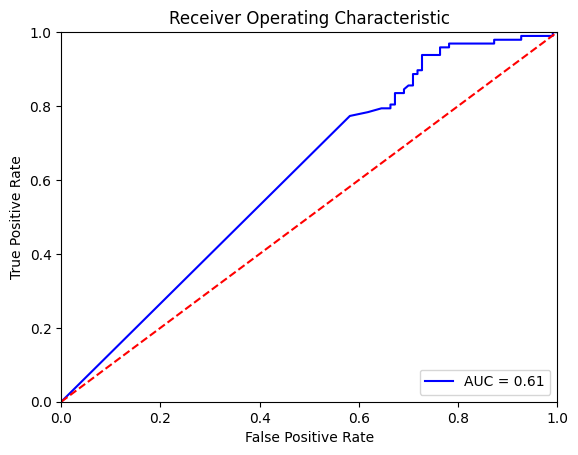

In [647]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Make a random forest

In [648]:
#include the following packages 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler



#IMPLEMENTING THE RANDOM FOREST MODEL

#FIRST, RESCALE DATA (Standard Scaling worked better on the random forest than the MinMaxScaler)  
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#INSTANTIATE RANDOM FOREST AND TRAIN MODEL (we adjusted the max depth to prevent overfitting & underfitting)
clf_rf = RandomForestClassifier(max_depth=4, random_state=0)
clf_rf.fit(X_train, y_train)
predictions_rf = clf_rf.predict(X_test)



#COMPARE RESULTS OF LOGISTIC REGRESSION TO RANDOM FOREST 

#CONFUSION TABLES 
confusion_matrix_lr = confusion_matrix(y_test, y_pred) 
confusion_matrix_rf = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix Random Forest: \n", confusion_matrix_rf)
print("Confusion Matrix Logistic Regression: \n", confusion_matrix_lr) 

#CLASSFICATION REPORT 
print("Classification Report for Random Forest: \n", classification_report(y_test, predictions_rf))
print("Classification Report Logistic Regression: \n", classification_report(y_test, y_pred))


#DO ANALYSIS ON THE RESULTS 

Confusion Matrix Random Forest: 
 [[98 12]
 [18 79]]
Confusion Matrix Logistic Regression: 
 [[88 22]
 [ 9 88]]
Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.87      0.81      0.84        97

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.85       207
weighted avg       0.86      0.86      0.85       207

Classification Report Logistic Regression: 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85       110
           1       0.80      0.91      0.85        97

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.85      0.85       207

